# Лабораторная работа 4
## Визуализация данных в Python

Информативная визуализация является одним из важнейших этапов анализа данных. 
Она может применяться для выявления выбросов, определения необходимых преобразований данных или поиска идей для разработки моделей. 
Построение интерактивной визуализации может быть и конечной целью исследования. 

В Python имеется много библиотек статической и динамической визуализации. 

Самой популярной библиотекой является Matplotlib. Она очень проста, богата на инструменты и способна строить статические диаграммы, не занимая большого количества кода, именно за это её так ценят специалисты Data Scienсe. Также, Matplotlib использует другие библиотеки в качестве обёртки, такие как Pandas и Seaborn.

Чтобы настроить интерактивный режим построения графиков Matplotlib в Jupyter-блокноте нужно выполнить команду %matplotlib notebook.


### 1. Знакомство с Matplotlib
При работе с Matplotlib используют следующее соглашение об импорте: 

import matplotlib.pyplot as plt. 


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

После выполнения команды %matplotlib notebook в Jupyter уже можно создать простой график с помощью команды plt.plot() 

In [2]:
#создаем простой набор данных из цифр от 0 до 10
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

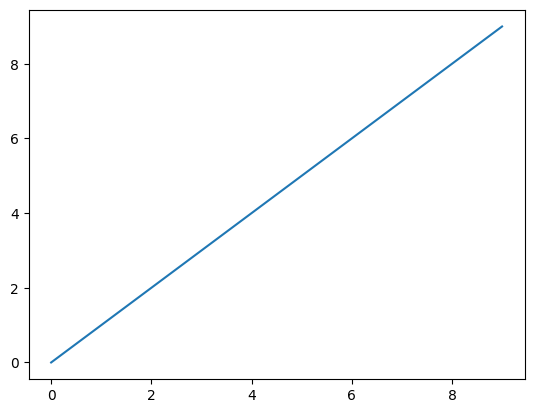

In [3]:
#строим простой график по данным из набора data
plt.plot(data)

Графики в Matplotlib располагаются внутри объекта рисунка Figure. 

Создать новый рисунок можно методом plt.figure(). 

Нельзя создать график, имея пустой рисунок. Сначала нужно создать один или несколько подграфиков с помощью метода add_subplot().

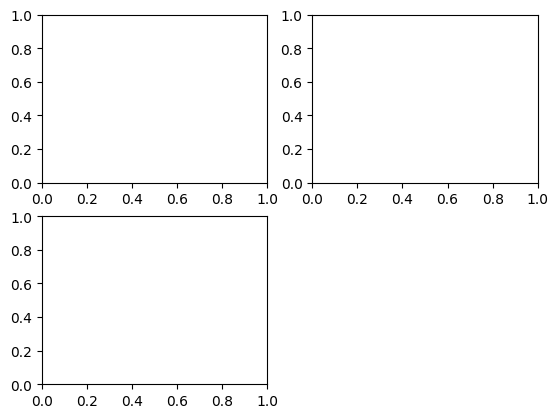

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

При выполнении команды построения графика plt.plot() Matplotlib рисует на последнем использованном рисунке и подграфике

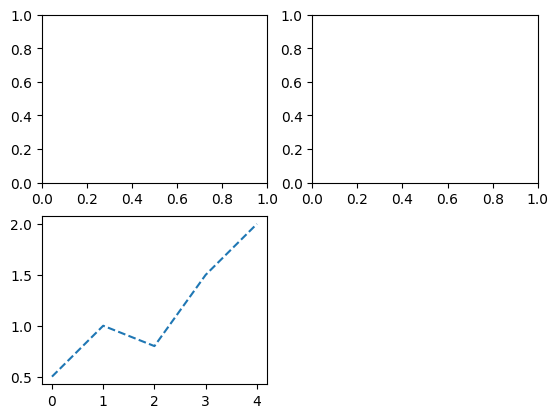

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot([0.5,1,0.8,1.5,2],'--')
#Параметр '--' означает, что линия должна быть пунктирной.

Метод fig.add_subplot возвращает объект AxesSubplot, который позволяет рисовать в другом пустом подграфике, вызывая его методы экземпляра.

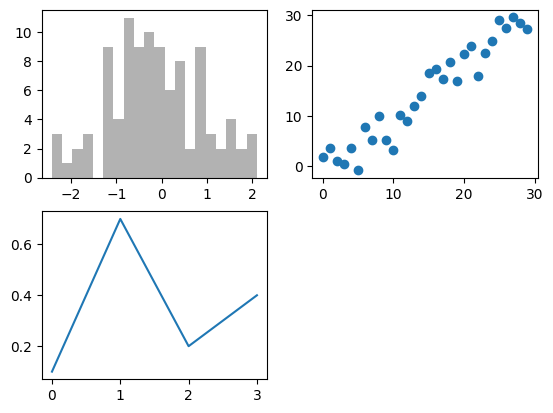

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot([0.1, 0.7, 0.2, 0.4])
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+ 3 * np.random.randn(30))
#Параметр color= 'k' означает, что линия должна быть черного цвета. 
#Полный перечень типов графиков имеется в документации по Matplotlib. 

Создание рисунка с несколькими подграфиками вполне типичная задача, поэтому в Python предусмотрен вспомогательный метод plt.subplots, который создает новый рисунок и возвращает массив NumPy, содержащий созданные в нем объекты подграфиков:

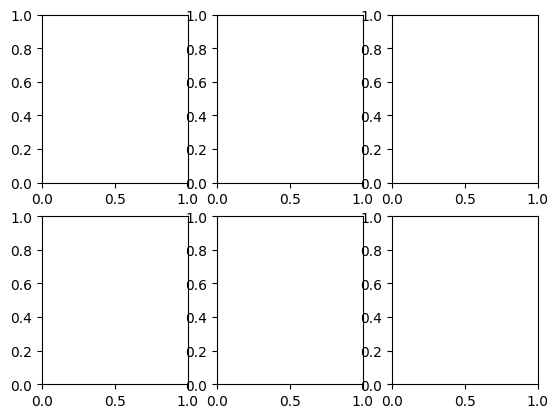

In [8]:
fig, axes=plt.subplots(2, 3)

В дальнейшем к массиву axes можно обращаться как к двумерному массиву, например axes[0, 1]. 

Можно также указать, что подграфики должны иметь общую ось x или y, с помощью параметров sharex и sharey соответственно.

Функция plot принимает массивы координат x и y, а также необязательную строку, в которой закодированы цвет и стиль линии. 

Например, чтобы нарисовать график зависимости y от x зеленой штриховой лини-ей , нужно выполнить следующий вызов:

ax.plot(x, y, 'g––')

или более понятно:

ax.plot(x, y, linestyle='––', color='g')

Линейные графики могут быть также снабжены маркерами, обо-значающими точки, по которым построен график. 

Маркер можно задать в строке стиля: сначала цвет, потом тип маркера и в конце стиль линии. 

То же самое можно записать явно:


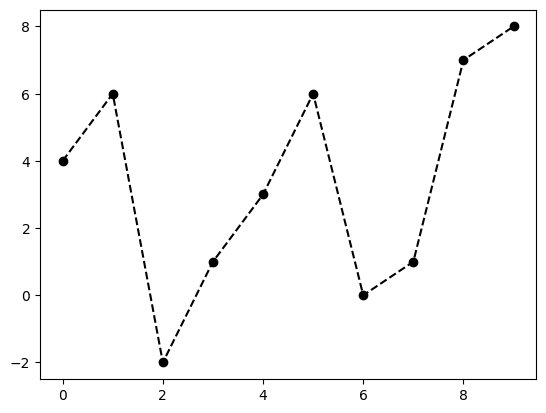

In [9]:
data=[4,6,-2,1,3,6,0,1,7,8]
plt.plot(data,color='k',linestyle='dashed',marker='o')

По умолчанию на линейных графиках соседние точки соединяются отрезками прямой, т.е. осуществляется линейная интерполяция. Параметр drawstyle позволяет изменить этот режим:

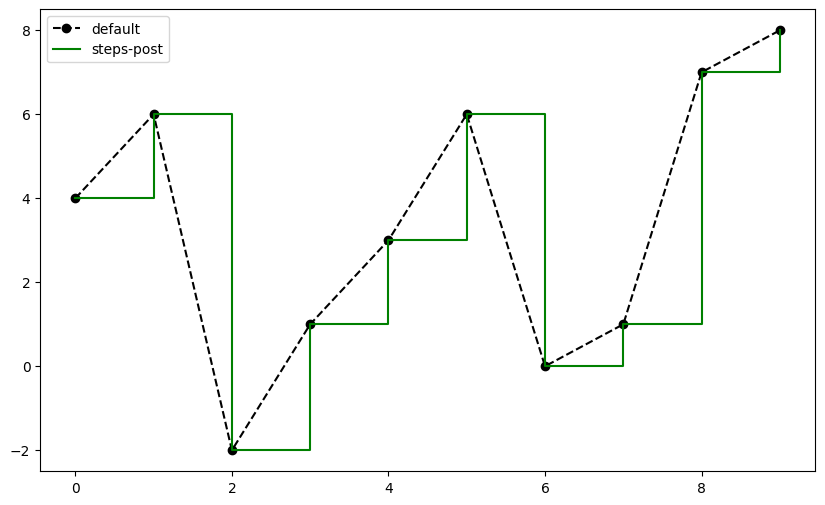

In [31]:
data=[4,6,-2,1,3,6,0,1,7,8]
plt.plot(data,color='k',linestyle='dashed',marker='o', label='default')
plt.plot(data,color='g',linestyle='solid',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')
#Аргумент label позволяет добавить на график надпись, описываю-щую каждую линию.

Для оформления графиков можно использовать интерфейс pyplot, который состоит из методов xlim, xticks и xticklabels. 

Они управляют размером области, занятой графиком, положением и метками рисок соответственно. 

Использовать их можно двумя способами:
- при вызове без аргументов возвращается текущее значение параметра. Например, метод plt.xlim() возвращает текущий диапазон значений по оси x;
- при вызове с аргументами устанавливается новое значение параметра. Например, в результате вызова plt.xlim([0, 10]) диапазон значений по оси x устанавливается от 0 до 10.

Для иллюстрации оформления осей создадим простой рисунок и в нем график случайного блуждания:


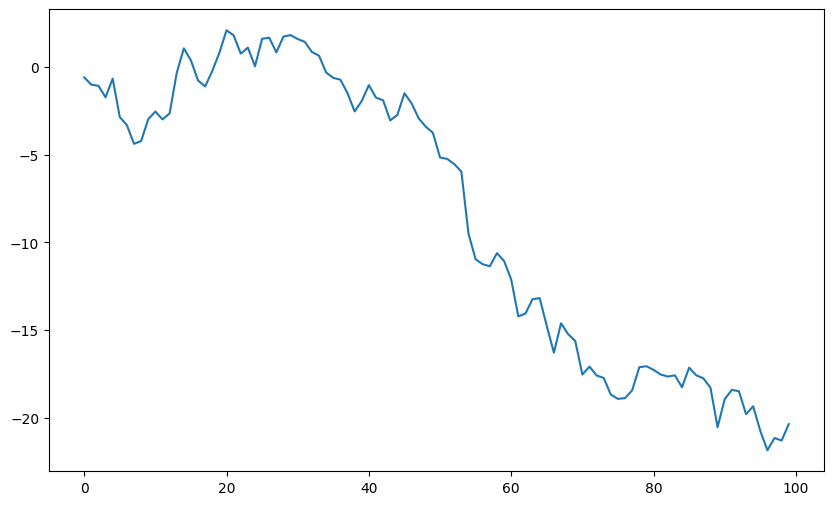

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum())

Для изменения рисок на оси x проще всего воспользоваться методами set_xticks и set_xticklabels. 

С помощью метода set_xticks можно определить, где именно пределах диапазона значений данных ставить риски 

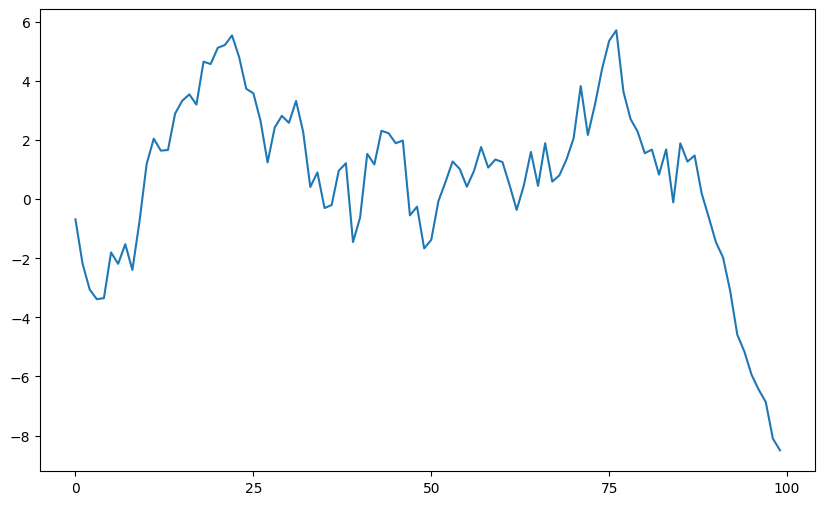

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum())
ticks = ax.set_xticks([0,25,50,75,100])

Метод set_xticklabels позволяет задать другие метки:

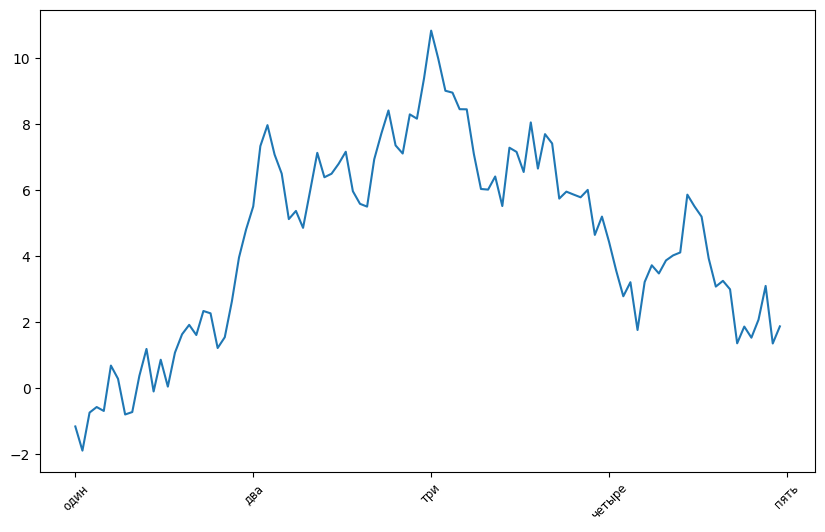

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum())
ticks = ax.set_xticks([0,25,50,75,100])
ticks = ax.set_xticklabels(['один' , 'два', 'три', 'четыре' , 'пять'] , rotation=45, fontsize= 'small')

Аргумент rotation устанавливает угол наклона меток рисок к оси x. 

С помощью метода set_xlabel можно подписать ось x, а метод set_title задает название подграфика:

Text(0.5, 0, 'Этапы')

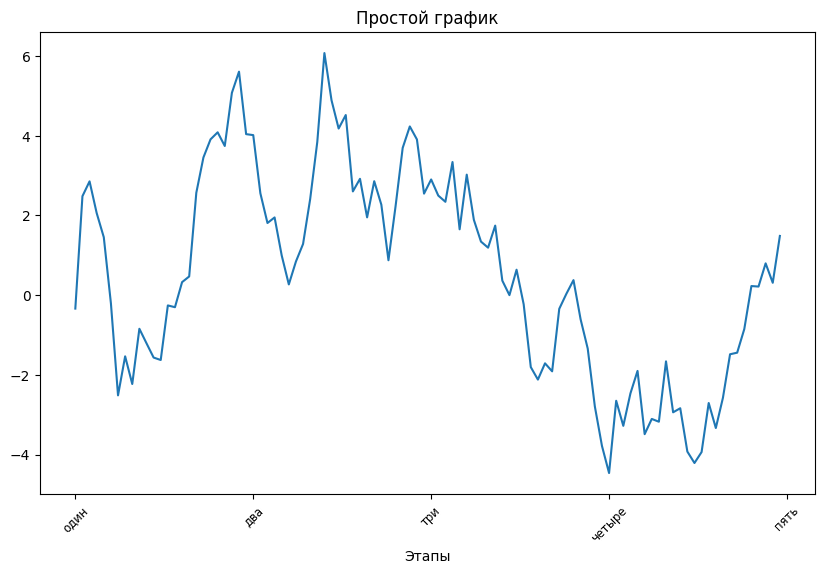

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum())
ticks = ax.set_xticks([0,25,50,75,100])
ticks = ax.set_xticklabels(['один' , 'два', 'три', 'четыре' , 'пять'] , rotation=45, fontsize= 'small')
ax.set_title('Простой график')
ax.set_xlabel('Этапы')

Активный рисунок можно сохранить в файле методом plt.savefig. 

Например, чтобы сохранить рисунок в формате SVG, достаточно ука-зать только имя файла:

plt.savefig(' drawing.svg')


### 2. Построение графиков с помощью Pandas и Seaborn
Библиотека Matplotlib – средство довольно низкого уровня. 

График собирается из базовых компонентов: тип графика, название, метки рисок и прочие аннотации.

Библиотек Pandas предоставляет методы построения, упрощающие создание визуализаций объектов DataFrame и Series. 

Библиотека Seaborn, разработанная на основе Matplotlib, является более высокоуровневой. Seaborn содержит более адекватные дефолтные настройки оформления графиков. 

Кроме того, в библиотеке есть достаточно сложные типы визуализации, которые в Matplotlib потребовали бы большого количество кода.

Для объектов Series и DataFrame имеется метод plot, который позволяет строить графики разных типов (по умолчанию он строит линейные графики).

In [36]:
#отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
#будем отображать графики прямо в jupyter'e
import seaborn as sns
#графики в svg выглядят боле четкими
%config InclineBackend.figure_format = 'png'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams ['figure.figsize'] = 6,6
#импортируем библиотеку pandas
import pandas as pd

<Axes: >

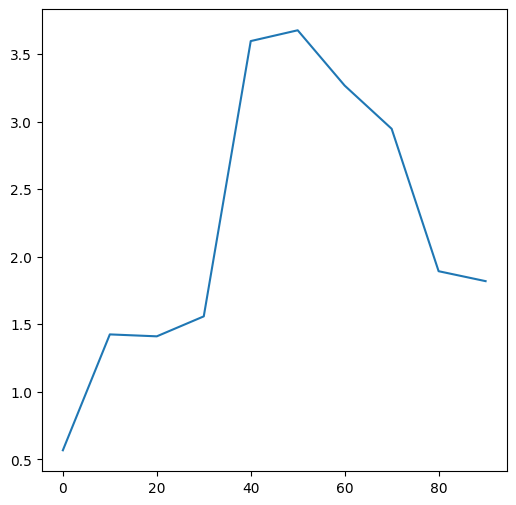

In [37]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
s.plot()

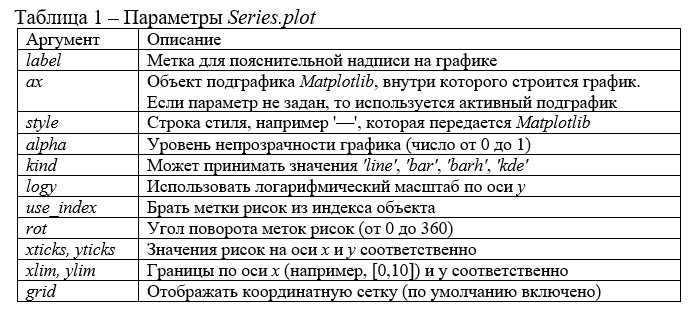

Метод plot объекта DataFrame строит отдельные графики каждого столбца внутри одного подграфика и автоматически создает пояснительную надпись.

В качестве примера построим график зависимости личного дохода от возраста. 

Считаем данные из файла scoring_eng.csv, отфильтруем только нужные столбцы, вычислим средний доход по возрасту и у получившегося dataframe вызовем функцию plot без параметров. 


In [38]:
#считаем данные из файла scoring_eng.csv
#при необходимости следует изменить путь к файлу
df = pd.read_csv('scoring_eng.csv')

<Axes: xlabel='ВОЗРАСТ'>

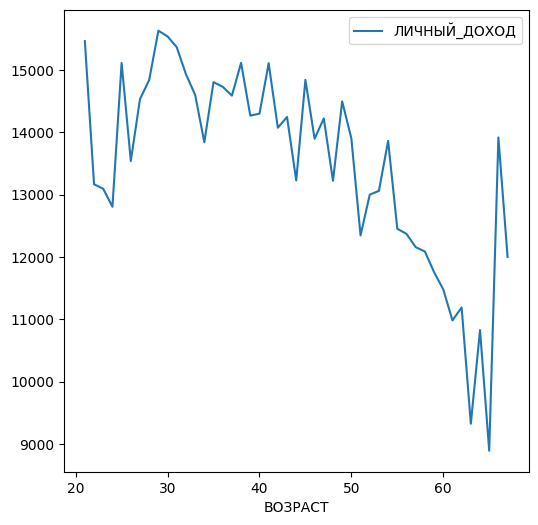

In [39]:
df[['ЛИЧНЫЙ_ДОХОД', 'ВОЗРАСТ']].groupby('ВОЗРАСТ').mean().plot()

C помощью параметра kind можно изменить тип графика, например, на bar chart. 

Поскольку диапазон значений по оси x (возраст) достаточно широкий, то увеличим размер окна:

<Axes: xlabel='ВОЗРАСТ'>

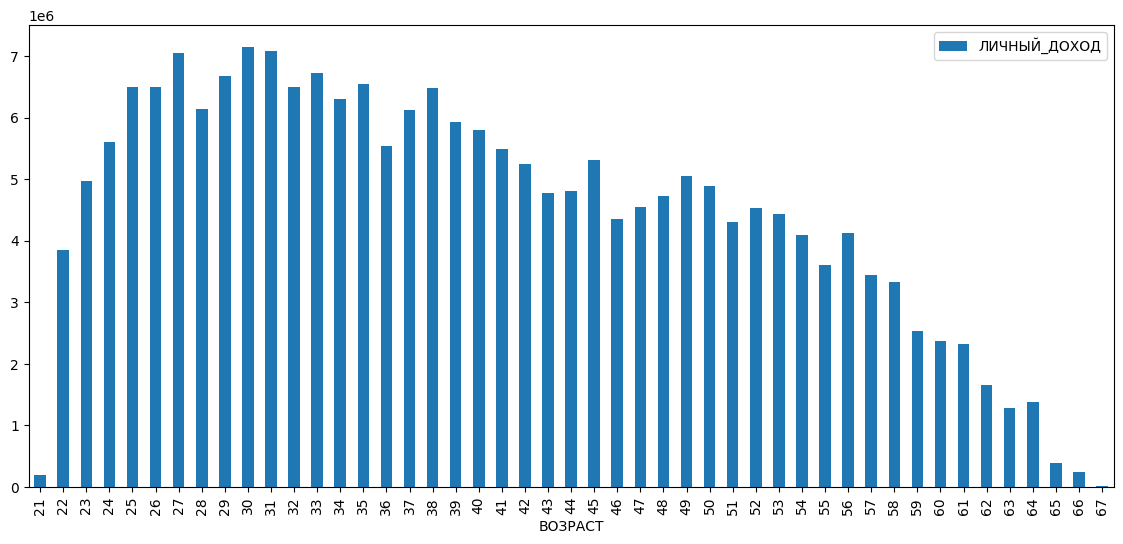

In [40]:
rcParams['figure.figsize']=14,6
df[['ЛИЧНЫЙ_ДОХОД', 'ВОЗРАСТ']].groupby('ВОЗРАСТ').sum().plot(kind='bar')

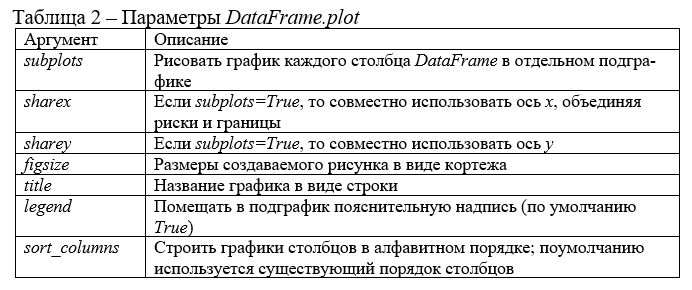

График типа pair plot (scatter plot matrix) из библиотеки Seaborn позволяет на одной картинке визуализировать взаимосвязь различных признаков. Например, визуализируем взаимосвязь признаков возраст, личный_доход и наличие_авто по данным датафрейма scoring_eng.csv:

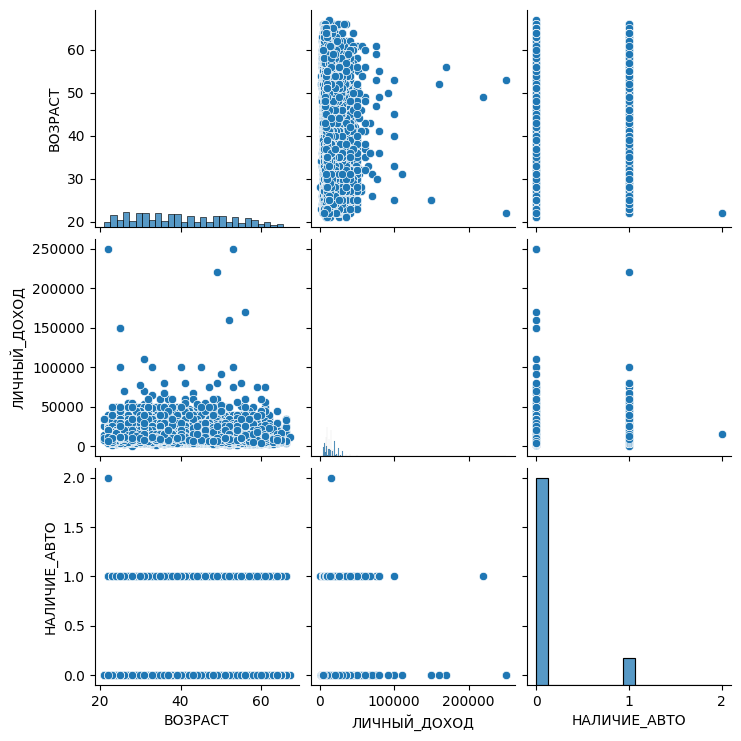

In [52]:
#с svg pairplot браузер начинает тормозить
%config InclineBackend.figure_format = 'png'
sns.pairplot(df[[ 'ВОЗРАСТ','ЛИЧНЫЙ_ДОХОД','НАЛИЧИЕ_АВТО']]);

Гистограмма, которая является разновидностью столбчатой диаграммы, показывает дискретизированное представление частоты. Результаты измерений распределяются по дискретным интервалам равной ширины, а на гистограмме отображается количество точек в каждом интервале.

С гистограммой тесно связан график плотности, который строится на основе оценки непрерывного распределения вероятности по результатам измерений. 

Обычно стремятся аппроксимировать это распределение комбинацией ядер, т.е. более простых распределений, например нормального (гауссова). 

Функция plot с параметром kind='kde' строит график плотности, применяя стандартный метод комбинирования нормальных распределений. 

Seaborn еще упрощает построение гистограмм и графиков плотности благодаря методу distplot, который может строить одновременно гистограмму и непрерывную оценку плотности:

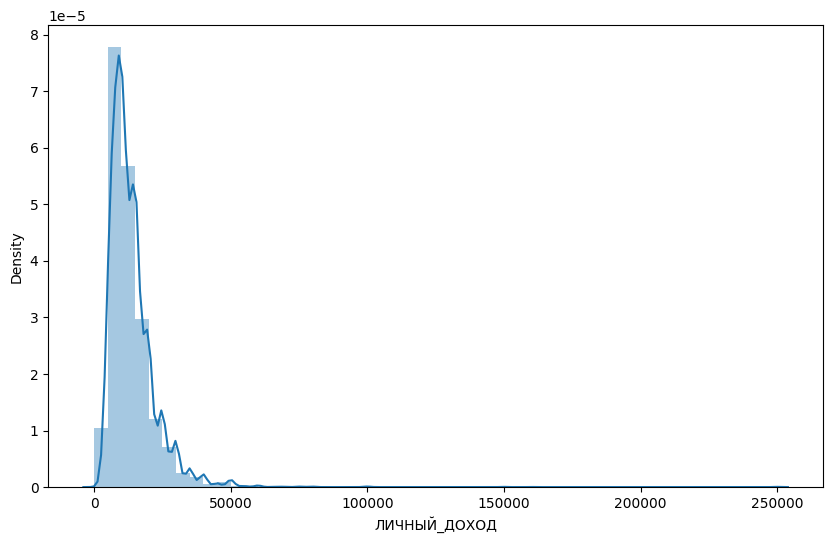

In [51]:
%config InclineBackend.figure_format = 'png'
rcParams['figure.figsize']=10,6
sns.distplot(df.ЛИЧНЫЙ_ДОХОД);

Для того чтобы еще более подробнее проанализировать взаимо-связь двух численных признаков можно использовать метод joint_plot –гибрид scatter plot и histogram, который отображает гистограммы распределений признаков:

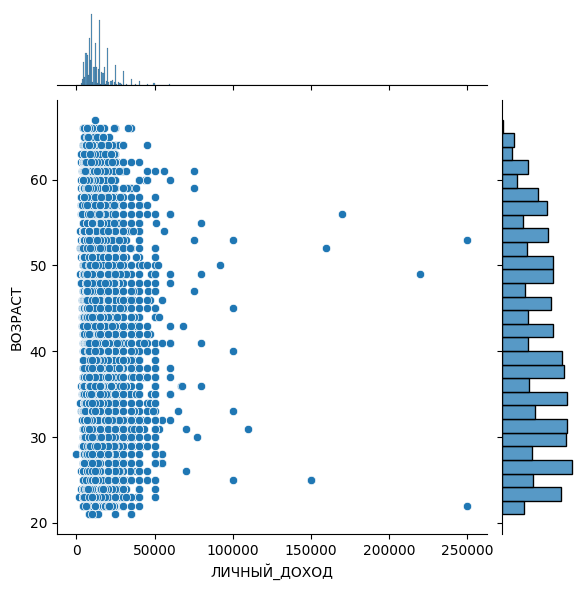

In [50]:
sns.jointplot(x = 'ЛИЧНЫЙ_ДОХОД', y='ВОЗРАСТ', data = df, kind = 'scatter')

Еще один полезный тип графиков – это box plot. 

Box plot используется в описательной статистике для компактного изображения одномерного распределения вероятностей. Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек.

Коробка показывает квантильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) процентили. 

Черта внутри коробки обозначает медиану распределения. 

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения статистически значимой выборки. 

Точками на графике обозначаются выбросы (outliers) – те значения, которые не вписываются в промежуток значений, заданных усами графика.

Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально.

<Axes: xlabel='ЛИЧНЫЙ_ДОХОД', ylabel='ОБРАЗОВАНИЕ'>

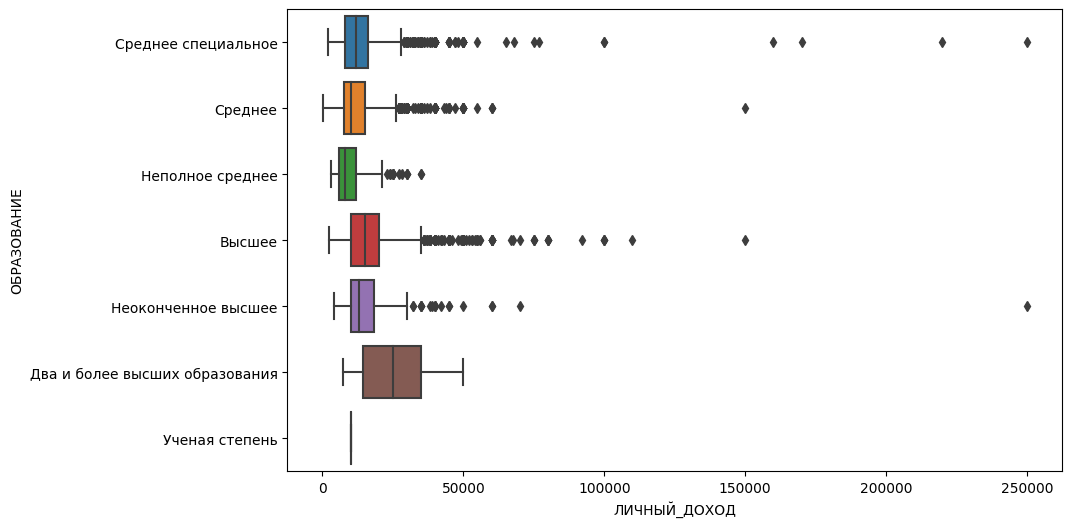

In [23]:
sns.boxplot(x = 'ЛИЧНЫЙ_ДОХОД', y='ОБРАЗОВАНИЕ', data = df, orient = "h")

Heatmap – это метод визуализации данных, который использует цвет, чтобы показать, как изменяется интересующее значение в зависимости от значений двух других переменных. 

Heatmap позволяет по-смотреть на распределение какого-то численного признака по двум категориальным.

В качестве примера визуализируем с помощью метода heatmap, как взаимосвязаны наличие авто, пол и величина личного дохода:

In [24]:
pivot = df.pivot_table(['ВОЗРАСТ', 'СТАЖ_В_ОРГАНИЗАЦИИ' , 'ЛИЧНЫЙ_ДОХОД' ] , 
                       ['НАЛИЧИЕ_АВТО' , 'ПОЛ' ], aggfunc = 'mean')

In [25]:
pivot = df.pivot_table(
                    index = 'НАЛИЧИЕ_АВТО',
                    columns = 'ПОЛ',
                    values = 'ЛИЧНЫЙ_ДОХОД' ,
                    aggfunc = np.max).fillna(0).applymap(float)




<Axes: xlabel='ПОЛ', ylabel='НАЛИЧИЕ_АВТО'>

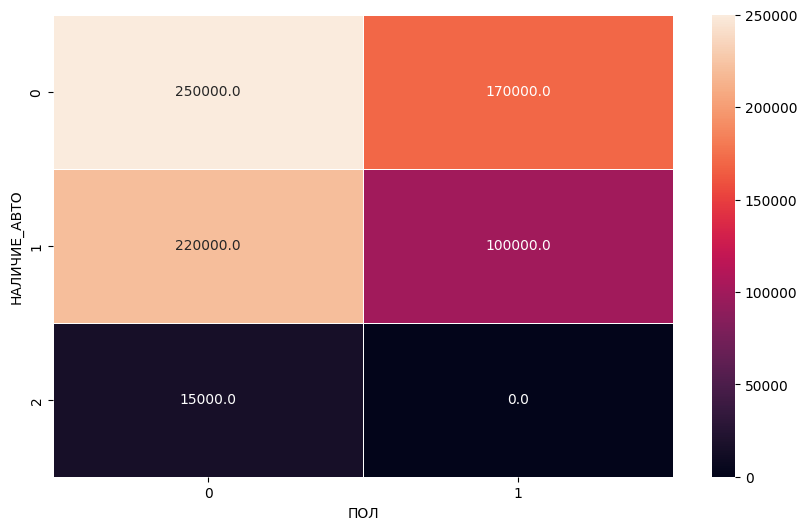

In [26]:
sns.heatmap(pivot, annot = True, fmt= '.1f', linewidths=.5)

### 3. Визуализация средствами Plotly
Plotly - это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook. 

С Plotly возможно описывать на Python динамичную интерактивную графику, ориентированную на отображение в браузере, а также создавать полноценные мини-приложения, которые делают результат работы аналитика более доступным для конечного пользователя.

Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.


In [57]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly 
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [56]:
dynamic = df[['ЛИЧНЫЙ_ДОХОД', 'ВОЗРАСТ']].groupby('ВОЗРАСТ').mean()

In [54]:
trace0 = go.Scatter(
    x= dynamic.index, 
    y= dynamic.ЛИЧНЫЙ_ДОХОД, 
    name = 'ЛИЧНЫЙ_ДОХОД от ВОЗРАСТ'
)

In [58]:
data = [trace0]
layout = {'title': 'Зависимость личного дохода от возраста'} 
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link=False)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Функция plotly.offline.plot() создает отдельный HTML-файл, кото-рый сохраняется локально и открывается в веб-браузере.

In [49]:
#экспорт графиков в локальный html
plotly.offline.plot(fig, filename='export_income.html', showlink=False)

TypeError: plot() got an unexpected keyword argument 'showlink'

Функция iplot создает интерактивную диаграмму рассеяния. 

Она позволяет контролировать внешний вид графиков, масштабировать, отображать информацию при наведении курсора и переключать данные для просмотра на диаграмме.

In [ ]:
data = []
for edu_level in df.ОБРАЗОВАНИЕ.unique():
    data.append(
    go.Box(y=df[df.ОБРАЗОВАНИЕ==edu_level].ЛИЧНЫЙ_ДОХОД, name=edu_level))

In [ ]:
iplot(data, show_link = True)